# 1, 2 - Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define path
path = r'C:\Users\Timbr\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 6'


In [3]:
#import 'df_nat_stat_trick_5on5_w_City_State.csv' to make df_10Game_MA
df_5on5_10Game_MA = pd.read_csv(os.path.join(path, 'Data', 'Cleaned Data', 'df_nat_stat_trick_5on5_EX64.csv'), index_col=False, low_memory=False, encoding='latin1')

# 3 - Clean Data

In [4]:
df_5on5_10Game_MA.head()

,Team-Date Combined for Vlookup,team,season,team-season,Game #,gameDate,situation,CF%_MA_10G,FF%_MA_10G,xGF%_MA_10G,SCF%_MA_10G,HDCF%_MA_10G
0,ANA-20081029,Anaheim Ducks,2008.0,Anaheim Ducks-2008,11,20081029,5on5,49.942,47.743,45.280,48.742,45.226
1,ANA-20081031,Anaheim Ducks,2008.0,Anaheim Ducks-2008,12,20081031,5on5,50.289,48.418,46.545,50.005,48.560
2,ANA-20081102,Anaheim Ducks,2008.0,Anaheim Ducks-2008,13,20081102,5on5,49.187,47.003,45.376,48.441,46.428
3,ANA-20081104,Anaheim Ducks,2008.0,Anaheim Ducks-2008,14,20081104,5on5,48.885,46.827,45.858,48.162,47.337
4,ANA-20081105,Anaheim Ducks,2008.0,Anaheim Ducks-2008,15,20081105,5on5,46.761,45.067,44.795,46.201,44.361


In [5]:
df_5on5_10Game_MA.shape


(34010, 12)

In [6]:
df_5on5_10Game_MA

,Team-Date Combined for Vlookup,team,season,team-season,Game #,gameDate,situation,CF%_MA_10G,FF%_MA_10G,xGF%_MA_10G,SCF%_MA_10G,HDCF%_MA_10G
0,ANA-20081029,Anaheim Ducks,2008.0,Anaheim Ducks-2008,11,20081029,5on5,49.942,47.743,45.280,48.742,45.226
1,ANA-20081031,Anaheim Ducks,2008.0,Anaheim Ducks-2008,12,20081031,5on5,50.289,48.418,46.545,50.005,48.560
2,ANA-20081102,Anaheim Ducks,2008.0,Anaheim Ducks-2008,13,20081102,5on5,49.187,47.003,45.376,48.441,46.428
3,ANA-20081104,Anaheim Ducks,2008.0,Anaheim Ducks-2008,14,20081104,5on5,48.885,46.827,45.858,48.162,47.337
4,ANA-20081105,Anaheim Ducks,2008.0,Anaheim Ducks-2008,15,20081105,5on5,46.761,45.067,44.795,46.201,44.361
...,...,...,...,...,...,...,...,...,...,...,...,...
34005,WPG-20230405,Winnipeg Jets,2022.0,Winnipeg Jets-2022,78,20230405,5on5,53.704,54.102,55.915,53.851,55.017
34006,WPG-20230408,Winnipeg Jets,2022.0,Winnipeg Jets-2022,79,20230408,5on5,54.921,55.202,57.326,55.590,56.294
34007,WPG-20230410,Winnipeg Jets,2022.0,Winnipeg Jets-2022,80,20230410,5on5,56.698,57.144,59.345,57.640,58.516
34008,WPG-20230411,Winnipeg Jets,2022.0,Winnipeg Jets-2022,81,20230411,5on5,57.376,57.998,60.189,58.464,60.047


In [7]:
df_5on5_10Game_MA.columns

Index(['Team-Date Combined for Vlookup', 'team', 'season', 'team-season',
       'Game #', 'gameDate', 'situation', 'CF%_MA_10G', 'FF%_MA_10G',
       'xGF%_MA_10G', 'SCF%_MA_10G', 'HDCF%_MA_10G'],
      dtype='object')

In [8]:
df_5on5_10Game_MA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34010 entries, 0 to 34009
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team-Date Combined for Vlookup  34010 non-null  object 
 1   team                            34010 non-null  object 
 2   season                          34002 non-null  float64
 3   team-season                     34010 non-null  object 
 4   Game #                          34010 non-null  int64  
 5   gameDate                        34010 non-null  int64  
 6   situation                       34010 non-null  object 
 7   CF%_MA_10G                      34010 non-null  float64
 8   FF%_MA_10G                      34010 non-null  float64
 9   xGF%_MA_10G                     34010 non-null  float64
 10  SCF%_MA_10G                     34010 non-null  float64
 11  HDCF%_MA_10G                    34010 non-null  float64
dtypes: float64(6), int64(2), object(

In [9]:
df_5on5_10Game_MA.dtypes

Team-Date Combined for Vlookup     object
team                               object
season                            float64
team-season                        object
Game #                              int64
gameDate                            int64
situation                          object
CF%_MA_10G                        float64
FF%_MA_10G                        float64
xGF%_MA_10G                       float64
SCF%_MA_10G                       float64
HDCF%_MA_10G                      float64
dtype: object

In [10]:
df_5on5_10Game_MA.isna().sum()

Team-Date Combined for Vlookup    0
team                              0
season                            8
team-season                       0
Game #                            0
gameDate                          0
situation                         0
CF%_MA_10G                        0
FF%_MA_10G                        0
xGF%_MA_10G                       0
SCF%_MA_10G                       0
HDCF%_MA_10G                      0
dtype: int64

In [11]:
#Checked for duplicates
df_5on5_10Game_MA.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34005    False
34006    False
34007    False
34008    False
34009    False
Length: 34010, dtype: bool

# 4 - Explore your data visually

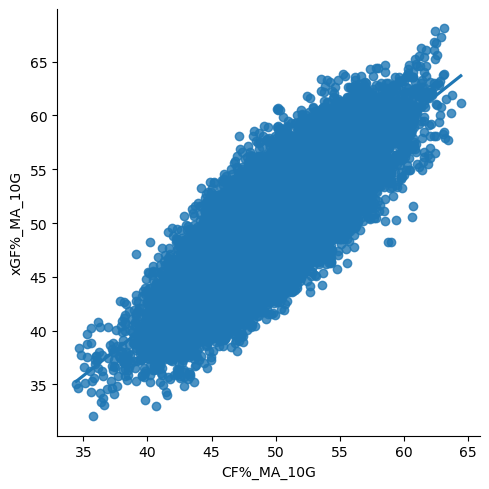

In [12]:
#Created scatterplot for units CF% and xGF%
scatter_CF_xGF = sns.lmplot(data=df_5on5_10Game_MA, x="CF%_MA_10G", y="xGF%_MA_10G")

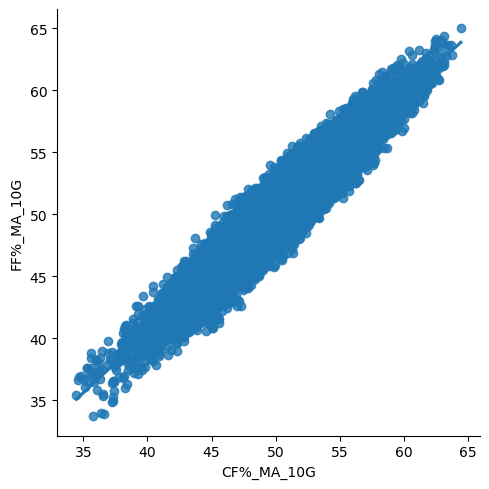

In [13]:
#Created scatterplot for units CF% and FF%
scatter_CF_FF = sns.lmplot(data=df_5on5_10Game_MA, x="CF%_MA_10G", y="FF%_MA_10G")

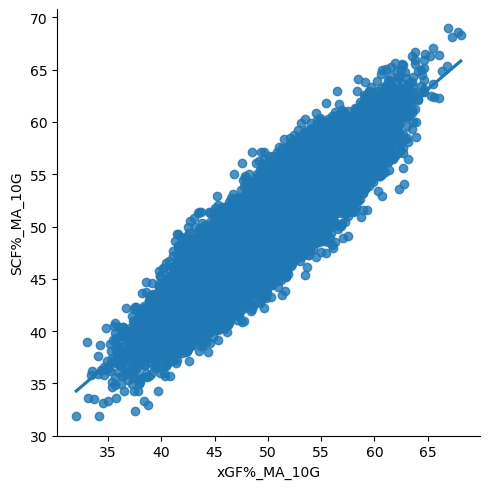

In [14]:
#Created scatterplot for units xGF% and SCF%
scatter_xGF_CF = sns.lmplot(data=df_5on5_10Game_MA, x="xGF%_MA_10G", y="SCF%_MA_10G")

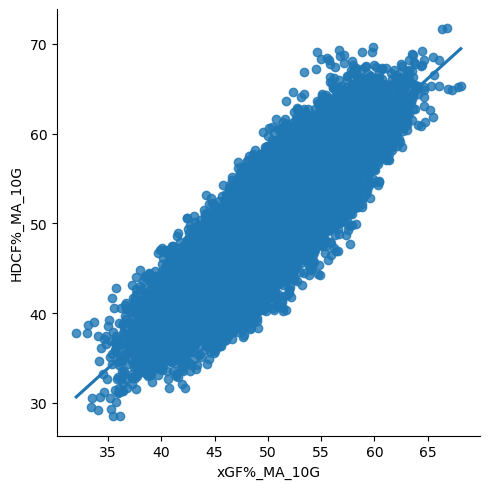

In [15]:
#Created scatterplot for units xGF% and SCF%
scatter_xGF_HDCF = sns.lmplot(data=df_5on5_10Game_MA, x="xGF%_MA_10G", y="HDCF%_MA_10G")

# 5 - hypothesis

The higher the CF% the higher the xGF% will be

# 6 - Reshape the variables into NumPy arrays

In [16]:
# Reshaped the variables into NumPy arrays and put them into separate objects.

X = df_5on5_10Game_MA['CF%_MA_10G'].values.reshape(-1,1)
y = df_5on5_10Game_MA['xGF%_MA_10G'].values.reshape(-1,1)

In [17]:
X

array([[49.942],
       [50.289],
       [49.187],
       ...,
       [56.698],
       [57.376],
       [55.051]])

In [18]:
y

array([[45.28 ],
       [46.545],
       [45.376],
       ...,
       [59.345],
       [60.189],
       [59.024]])

# 7 - Split data into two sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8 - Run a linear regression on the data

In [20]:
# Created a regression object

regression = LinearRegression()

In [21]:
# Fit regression object onto training set

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicted the values of y using X

y_predicted = regression.predict(X_test)

# 9 - plot showing regression line on the test set

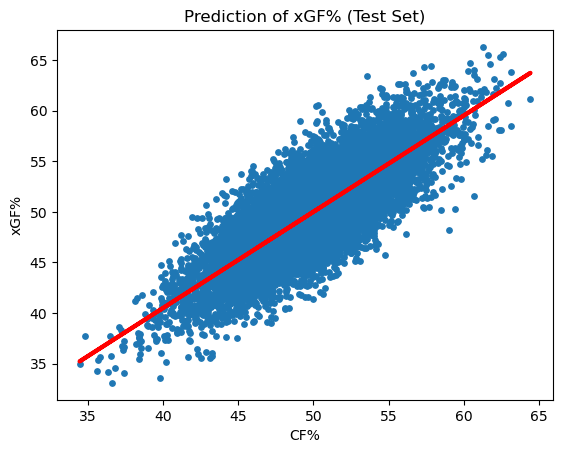

In [23]:
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of xGF% (Test Set)')
plot_test.xlabel('CF%')
plot_test.ylabel('xGF%')
plot_test.show()

# 10 - interpretation

As expected xGF% is related to CF%.  It looks like there the prediction is 1 to 1.  Meaning if CF% is 50 then xGF% should be 50.  However, the chart shows this is not the case.  There is some deviation, especially between 40 & 60.

# 11 - check MSE and R2

In [24]:
# Created a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,50.723,50.262483
1,37.319,40.823618
2,48.478,48.740361
3,57.794,56.030572
4,47.819,48.757474
5,46.229,48.230769
6,43.568,46.808474
7,51.156,51.243638
8,50.038,50.018145
9,58.865,55.729190


In [25]:
# Predicted

y_predicted_train = regression.predict(X_train)

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.95073177]]
Mean squared error:  7.293039207429449
R2 score:  0.6456061119753675


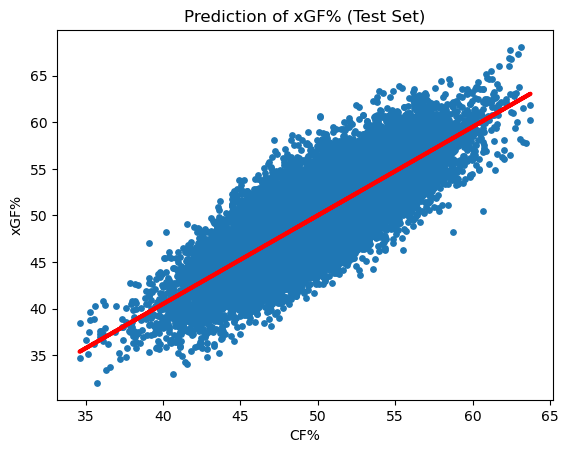

In [28]:
# Visualized the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of xGF% (Test Set)')
plot_test.xlabel('CF%')
plot_test.ylabel('xGF%')
plot_test.show()

In [29]:
# Created objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Printed the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.95073177]]
Mean squared error:  7.4157226107178955
R2 score:  0.6419124347812168


# 12 - Compare predicted y values with actual y values

In [31]:
# Created a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,50.723,50.262483
1,37.319,40.823618
2,48.478,48.740361
3,57.794,56.030572
4,47.819,48.757474
5,46.229,48.230769
6,43.568,46.808474
7,51.156,51.243638
8,50.038,50.018145
9,58.865,55.729190


# 13 - Thoughts

I would say the results are a bit inconclusive.  In a few they are very close, less then .01%.  These are: 7, 8 & 14

However there are some that show greater than a 4 % difference. These are: 10, 12, 25 & 27 

I would have expected these all to be within 1 or 2 % points.
